<img src="./logo_UNSAM.jpg" align="right" width="150" />  -->

#### Análisis y procesamiento de señales

# Trabajo Práctico Nº4
#### Santiago Manuel Corral

## Introducción

#### Estimadores

Debido a que en la realidad no es posible conocer las funciones de densidad de probabilidades las cuales nos permiten averiguar mediciones tales como la media, varianza y correlación, debemos introducir el concepto de estimadores. Estos son procedimientos o funciones las cuales, como bien dice su nombre, nos permite estimar parametros desconocidos de una señal. 

Para esta experiencia trabajaremos con dos estimadores en particular:
- Estimador de **amplitud** ($\hat{a}_n^{(i)}$), la cual representa la energía de la señal.
- Estimador de **frecuencia** ($\hat{\Omega}_n^{(i)}$), la cual determina la periodicidad de las oscilaciones de la señal.

En naturaleza de las señales y procesos, resulta imposible pensar una señal no afectada por ruido. Este puede ser inducido por varias razones como procesos de cuantización, errores de medición, o la misma naturaleza de los componentes electrónicos. Por eso resulta de vital importancia trabajar con estimadores los cuales nos aseguren parametros precisos, confiables y relevantes respecto a las señales reales. 

Para este análisis tomamos una señal senoidal cotidiana de la forma: 

$$ x(n)=a_1 ⋅ sen(Ω_1⋅n)+n_a(n)$$

Siendo: 
- $a_1$ la amplitud de la señal:
- $\Omega_1 = \Omega_0 + f_r . \frac{2\pi}{N} $ la frecuencia angular
- $\Omega_0 = \frac{\pi}{2} $ la frecuencia central 

Y las variables aleatorias definidas como:
- $f_r \sim  \mathcal{U} (-\frac{1}{2},\frac{1}{2}) $ Variable aleatoria
- $n_a(n) \sim \mathcal{N} (0, \sigma^2 )   $ Ruido blanco

Donde $f_r$ es utilizada para simular la incertidumbre en la frecuencia, induciendo una pequeña variación aleatoria. Y $n_a(n)$ induce ruido blanco gaussiano, simulando una interferencia. 

Luego, como buscamos averiguar la amplitud y la frecuencia de la señal, utilizaremos los siguientes estimadores: 
- $\hat{a}_1^{(i)} = |X_{iw}(\Omega_0)| = |\mathcal{F}\{x(n) . w_i(n)\} $ 
- $\hat{\Omega}_1^{(i)} = \arg\max_{\Omega} \left\{ |X_{iw}(\Omega)| \right\}$

Siendo $w_i(n)\ $  una ventana la cual sera aplicada en el dominio del tiempo. En la frecuencia, esta operación se ve traducida como una convolución entre el espectro de la señal y el espectro de la ventana, redistribuyendo la energía de la señal en el espectro, a esto se lo denomina desparramo espectral. 

El ancho del lobulo principal de la ventana es proporcional con la resolución espectral e inversamente proporcional con el desparramo espectral. Es decir, cuanto mas ancho sea el lobulo principal, tendremos una mejor resolución en frecuencia, pero sacrificamos exactitud en los parametros debido a que el desparramo espectral afecta la energía asociada a cada frecuencia. Por esta razón, resulta muy importante trabajar con la ventana correcta, encontrando un buen balance entre esta relación, teniendo una buena resolución con el minimo desparramo. En este trabajo se utilizaron las siguientes ventanas: 

## Rectangular o Sinc

<img src="./Boxcar.png"/>
<img src="./BoxcarResFrecuencias.png"/>

## Blackman Harris

<img src="./BlackmanHarris.png"/>
<img src="./BlackmanHarrisResFrecuencias.png"/>

## Flattop

<img src="./Flattop.png"/>
<img src="./FlattopResFrecuencias.png"/>

## Lanczos

<img src="./Lanczos.png"/>
<img src="./LanczosResFrecuencias.png"/>

Comparando estas ventanas con sus respuestas en frecuencias podemos ver como efectivamente el ancho del lóbulo principal de la ventana afecta a la resolución y el desparramo espectral, el cual podemos evidenciar según que tan bajos resultan los lóbulos laterales en el espectro en frecuencias. 

El analisis que buscamos para evaluar entonces la exactitud de estos estimadores es evaluar su sesgo y su varianza. El sesgo refleja que tan cercano es el valor esperado del estimador al valor real que estamos estimando. Y la varianza mide la dispersión de los valores alrededor del valor esperado, por lo que nos muestra que tan estable resulta el estimador.  

Modulos y funciones iniciales:

In [20]:
#%% módulos y funciones a importar
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal.windows as windows
#import pandas as pd

Datos de la simulación

In [21]:
#%% Datos de la simulación

R = 200 #Realizaciones
N = 1000 # cantidad de muestras
fs =  1000 # frecuencia de muestreo (Hz)
SNR = 3 #dB, piso de ruido

Código y resultados

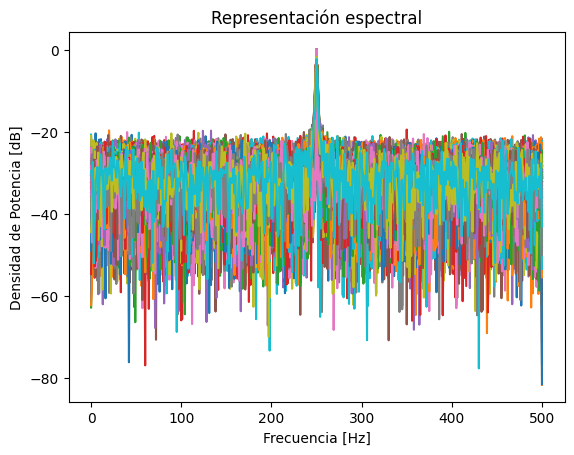

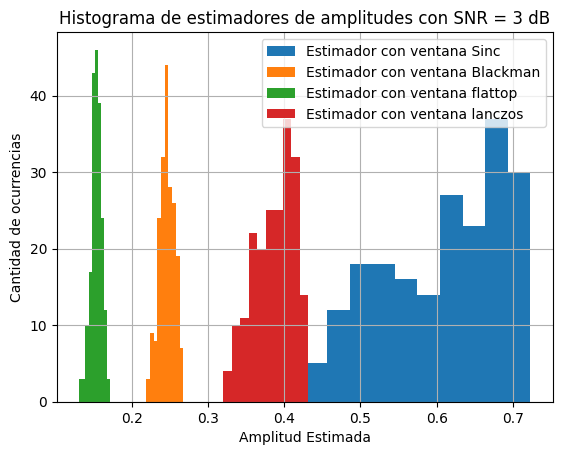

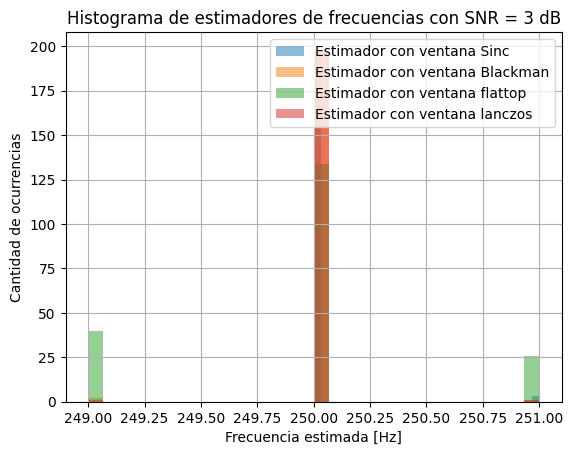

In [22]:
#%%

ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

tt = np.linspace (0, (N-1)*ts, N).reshape((N,1)) #vector de tiempo
ff = np.linspace(0, (N-1)*df, N) #Grilla de sampleo frecuencial

#generacion de la señal senoidal
tt = np.tile(tt, (1,R))

fr = np.random.uniform(-1/2,1/2, size = (1,R))
fr = np.reshape(fr, (1,R))

omega_0 = fs/4 #Mitad de banda digital
omega_1 = omega_0 +  fr * df #como luego lo usamos para el sesgo, multiplicamos por 2pi dentro del seno


a1 = np.sqrt(2)
xx = a1 * np.sin(2*np.pi*omega_1*tt) 
#El A1 lo usamos para normalizar

#%% Genero Ruido

pot_ruido = 10**(-SNR/10) #Como se define esto?

# ff = np.arange(0, 1, 1/1000).reshape((1000,1))
# ff = np.repeat(tt, 200, axis = 1)
nn = np.random.normal(0,np.sqrt(pot_ruido),(N,R)) #señal de ruido analogico, le doy el tamaño de xx

#%%
ss = xx+nn #Señal mas ruido

#%%
blackmanharris = windows.blackmanharris(N).reshape(N,1) # Reshape para multiplicar por la matriz ss
flattop = windows.flattop(N).reshape(N,1)
lanczos = windows.lanczos(N).reshape(N,1)

#Multiplico por la ventana
ssblackman = ss * blackmanharris
ssflattop = ss * flattop
sslanczos = ss * lanczos

#%% FFT, respuesta en frecuencia
ft_sinc = 1/N*np.fft.fft(ss, axis = 0) #es como multiplicar por uno el sinc
ft_blackman = 1/N*np.fft.fft(ssblackman, axis = 0)
ft_flattop = 1/N*np.fft.fft(ssflattop, axis = 0)
ft_lanczos = 1/N*np.fft.fft(sslanczos, axis = 0)

bfrec = ff <= fs/2

#plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_blackman[bfrec])**2)) 
#plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_flattop[bfrec])**2)) 
#plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_lanczos[bfrec])**2))
plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_sinc[bfrec])**2)) 
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral")
axes_hdl = plt.gca()

## Estimadores de a para cada ventana
# Tomo una feta en N/4 (250) donde tengo el pulso para ver el histograma
est_a_sinc = np.abs(ft_sinc [N//4,:])
est_a_blackman = np.abs(ft_blackman [N//4,:])
est_a_flattop = np.abs(ft_flattop [N//4,:])
est_a_lanczos = np.abs(ft_lanczos [N//4,:])

#%% Histograma de amplitudes
plt.figure()
bins = 10
plt.hist(est_a_sinc.flatten(), bins=bins, label = "Estimador con ventana Sinc")
plt.hist(est_a_blackman.flatten(), bins=bins, label = "Estimador con ventana Blackman")
plt.hist(est_a_flattop.flatten(), bins=bins, label = "Estimador con ventana flattop")
plt.hist(est_a_lanczos.flatten(), bins=bins, label = "Estimador con ventana lanczos")
plt.legend()
plt.grid("on")

plt.xlabel("Amplitud Estimada")
plt.ylabel("Cantidad de ocurrencias")
plt.title(f"Histograma de estimadores de amplitudes con SNR = {SNR} dB" )

#Cada ventana concentra distinto la energía 

#%% Estimadores de omega para cada ventana

ftabs_sinc = np.abs(ft_sinc[:N//2, :])
ftabs_blackman = np.abs(ft_blackman[:N//2, :])
ftabs_flattop = np.abs(ft_flattop[:N//2, :])
ftabs_lanczos = np.abs(ft_lanczos[:N//2, :])

est_omega_sinc = np.argmax(ftabs_sinc, axis = 0) * df
est_omega_blackman = np.argmax(ftabs_blackman, axis = 0) * df
est_omega_flattop = np.argmax(ftabs_flattop, axis = 0) * df
est_omega_lanczos = np.argmax(ftabs_lanczos, axis = 0) * df

#%% Histograma de frecuencias
plt.figure()
bins = 30
plt.hist(est_omega_sinc.flatten(), bins=bins, label = "Estimador con ventana Sinc", alpha=0.5)
plt.hist(est_omega_blackman.flatten(), bins=bins, label = "Estimador con ventana Blackman", alpha=0.5)
plt.hist(est_omega_flattop.flatten(), bins=bins, label = "Estimador con ventana flattop", alpha=0.5)
plt.hist(est_omega_lanczos.flatten(), bins=bins, label = "Estimador con ventana lanczos", alpha=0.5)
plt.legend()
plt.grid("on")

plt.xlabel("Frecuencia estimada [Hz]")
plt.ylabel("Cantidad de ocurrencias")
plt.title(f"Histograma de estimadores de frecuencias con SNR = {SNR} dB" )

#%% Sesgo y varianza de los estimadores de aplitud

esperanza_a_sinc = np.mean(est_a_sinc)
esperanza_a_blackman = np.mean(est_a_blackman)
esperanza_a_flattop = np.mean(est_a_flattop)
esperanza_a_lanczos = np.mean(est_a_lanczos)

sesgo_a_sinc = esperanza_a_sinc - a1 #siendo a1 el valor real, no el estimado
sesgo_a_blackman = esperanza_a_blackman - a1
sesgo_a_flattop = esperanza_a_flattop - a1
sesgo_a_lanczos = esperanza_a_lanczos - a1

varianza_a_sinc = np.var(est_a_sinc)
varianza_a_blackman = np.var(est_a_blackman)
varianza_a_flattop = np.var(est_a_flattop)
varianza_a_lanczos = np.var(est_a_lanczos)

## Sesgo y varianza de los estimadores de frecuencia espectral

esperanza_o_sinc = np.mean(est_omega_sinc)
esperanza_o_blackman = np.mean(est_omega_blackman)
esperanza_o_flattop = np.mean(est_omega_flattop)
esperanza_o_lanczos = np.mean(est_omega_lanczos)

sesgo_o_sinc = esperanza_o_sinc - omega_0 #siendo omega_1 el valor real, no el estimado
sesgo_o_blackman = esperanza_o_blackman - omega_0
sesgo_o_flattop = esperanza_o_flattop - omega_0
sesgo_o_lanczos = esperanza_o_lanczos - omega_0

varianza_o_sinc = np.var(est_omega_sinc)
varianza_o_blackman = np.var(est_omega_blackman)
varianza_o_flattop = np.var(est_omega_flattop)
varianza_o_lanczos = np.var(est_omega_lanczos)

 #%% Tabla de resultados (Este es el codigo usado para generar la tabla de resultados, jupyter no reconoce la librería panda, por lo que inserto
#las imagenes de las tablas generadas a continuación)

#  #Importe una libreria llamada pandas la cual resulta muy util para este tipo de tablas

# # Crear la tabla con tus valores (reemplazá con tus propios datos si es necesario)
# tabla_resultados = pd.DataFrame({
#     "Ventana": ["Sinc", "Blackman", "Flattop", "Lanczos"],
#     "Sesgo A1": [sesgo_a_sinc, sesgo_a_blackman, sesgo_a_flattop, sesgo_a_lanczos],
#     "Varianza A1": [varianza_a_sinc, varianza_a_blackman, varianza_a_flattop, varianza_a_lanczos],
#     "Sesgo Ω1": [sesgo_o_sinc, sesgo_o_blackman, sesgo_o_flattop, sesgo_o_lanczos],
#     "Varianza Ω1": [varianza_o_sinc, varianza_o_blackman, varianza_o_flattop, varianza_o_lanczos]
# })

# # Redondear para mejorar la estética
# tabla_resultados = tabla_resultados.round(6)

# # Crear la figura y los ejes
# fig, ax = plt.subplots(figsize=(10, 3))
# ax.axis('off')  # Ocultar los ejes

# # Dibujar la tabla
# tabla = ax.table(cellText=tabla_resultados.values,
#                  colLabels=tabla_resultados.columns,
#                  cellLoc='center',
#                  loc='center')

# tabla.scale(1.2, 1.5)  # Escalar tabla para mejor legibilidad

# # Título de la tabla
# plt.title(f"Sesgo y Varianza de Estimadores con SNR {SNR} dB", fontsize=14, pad=20)

# plt.tight_layout()
# plt.show()

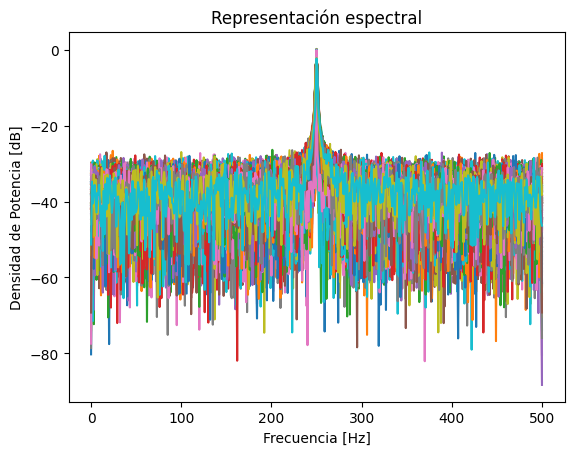

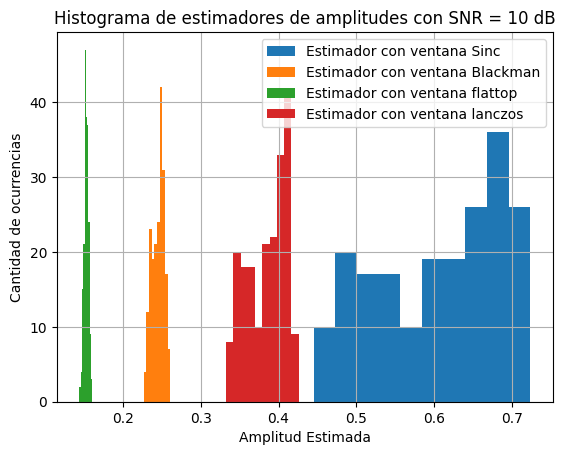

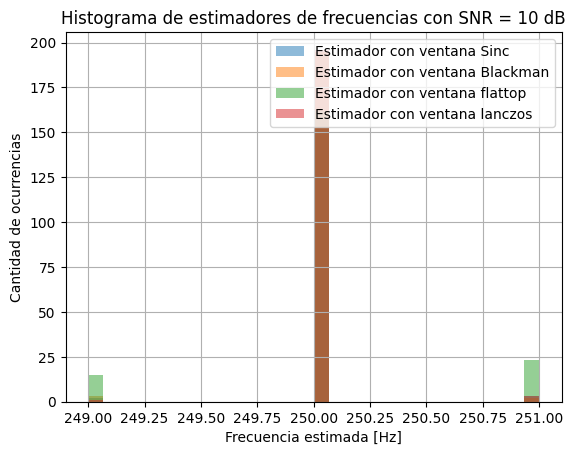

In [23]:
#Vario SNR
SNR = 10 #dB, piso de ruido
pot_ruido = 10**(-SNR/10)
nn = np.random.normal(0,np.sqrt(pot_ruido),(N,R)) #señal de ruido analogico, le doy el tamaño de xx
ss = xx+nn #Señal mas ruido

#Multiplico por la ventana
ssblackman = ss * blackmanharris
ssflattop = ss * flattop
sslanczos = ss * lanczos

#%% FFT, respuesta en frecuencia
ft_sinc = 1/N*np.fft.fft(ss, axis = 0) #es como multiplicar por uno el sinc
ft_blackman = 1/N*np.fft.fft(ssblackman, axis = 0)
ft_flattop = 1/N*np.fft.fft(ssflattop, axis = 0)
ft_lanczos = 1/N*np.fft.fft(sslanczos, axis = 0)

bfrec = ff <= fs/2

#plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_blackman[bfrec])**2)) 
#plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_flattop[bfrec])**2)) 
#plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_lanczos[bfrec])**2))
plt.plot(ff[bfrec], 10* np.log10(2*np.abs(ft_sinc[bfrec])**2)) 
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title("Representación espectral")
axes_hdl = plt.gca()

## Estimadores de a para cada ventana
# Tomo una feta en N/4 (250) donde tengo el pulso para ver el histograma
est_a_sinc = np.abs(ft_sinc [N//4,:])
est_a_blackman = np.abs(ft_blackman [N//4,:])
est_a_flattop = np.abs(ft_flattop [N//4,:])
est_a_lanczos = np.abs(ft_lanczos [N//4,:])

#%% Histograma de amplitudes
plt.figure()
bins = 10
plt.hist(est_a_sinc.flatten(), bins=bins, label = "Estimador con ventana Sinc")
plt.hist(est_a_blackman.flatten(), bins=bins, label = "Estimador con ventana Blackman")
plt.hist(est_a_flattop.flatten(), bins=bins, label = "Estimador con ventana flattop")
plt.hist(est_a_lanczos.flatten(), bins=bins, label = "Estimador con ventana lanczos")
plt.legend()
plt.grid("on")

plt.xlabel("Amplitud Estimada")
plt.ylabel("Cantidad de ocurrencias")
plt.title(f"Histograma de estimadores de amplitudes con SNR = {SNR} dB" )

#Cada ventana concentra distinto la energía 

#%% Estimadores de omega para cada ventana

ftabs_sinc = np.abs(ft_sinc[:N//2, :])
ftabs_blackman = np.abs(ft_blackman[:N//2, :])
ftabs_flattop = np.abs(ft_flattop[:N//2, :])
ftabs_lanczos = np.abs(ft_lanczos[:N//2, :])

est_omega_sinc = np.argmax(ftabs_sinc, axis = 0) * df
est_omega_blackman = np.argmax(ftabs_blackman, axis = 0) * df
est_omega_flattop = np.argmax(ftabs_flattop, axis = 0) * df
est_omega_lanczos = np.argmax(ftabs_lanczos, axis = 0) * df

#%% Histograma de frecuencias
plt.figure()
bins = 30
plt.hist(est_omega_sinc.flatten(), bins=bins, label = "Estimador con ventana Sinc", alpha=0.5)
plt.hist(est_omega_blackman.flatten(), bins=bins, label = "Estimador con ventana Blackman", alpha=0.5)
plt.hist(est_omega_flattop.flatten(), bins=bins, label = "Estimador con ventana flattop", alpha=0.5)
plt.hist(est_omega_lanczos.flatten(), bins=bins, label = "Estimador con ventana lanczos", alpha=0.5)
plt.legend()
plt.grid("on")

plt.xlabel("Frecuencia estimada [Hz]")
plt.ylabel("Cantidad de ocurrencias")
plt.title(f"Histograma de estimadores de frecuencias con SNR = {SNR} dB" )

#%% Sesgo y varianza de los estimadores de aplitud

esperanza_a_sinc = np.mean(est_a_sinc)
esperanza_a_blackman = np.mean(est_a_blackman)
esperanza_a_flattop = np.mean(est_a_flattop)
esperanza_a_lanczos = np.mean(est_a_lanczos)

sesgo_a_sinc = esperanza_a_sinc - a1 #siendo a1 el valor real, no el estimado
sesgo_a_blackman = esperanza_a_blackman - a1
sesgo_a_flattop = esperanza_a_flattop - a1
sesgo_a_lanczos = esperanza_a_lanczos - a1

varianza_a_sinc = np.var(est_a_sinc)
varianza_a_blackman = np.var(est_a_blackman)
varianza_a_flattop = np.var(est_a_flattop)
varianza_a_lanczos = np.var(est_a_lanczos)

## Sesgo y varianza de los estimadores de frecuencia espectral

esperanza_o_sinc = np.mean(est_omega_sinc)
esperanza_o_blackman = np.mean(est_omega_blackman)
esperanza_o_flattop = np.mean(est_omega_flattop)
esperanza_o_lanczos = np.mean(est_omega_lanczos)

sesgo_o_sinc = esperanza_o_sinc - omega_0 #siendo omega_1 el valor real, no el estimado
sesgo_o_blackman = esperanza_o_blackman - omega_0
sesgo_o_flattop = esperanza_o_flattop - omega_0
sesgo_o_lanczos = esperanza_o_lanczos - omega_0

varianza_o_sinc = np.var(est_omega_sinc)
varianza_o_blackman = np.var(est_omega_blackman)
varianza_o_flattop = np.var(est_omega_flattop)
varianza_o_lanczos = np.var(est_omega_lanczos)

## Análisis y conclusiónes



Gracias a este análisis podemos discutir y validar varios de los conceptos planteados anteriormente en la introducción:

- Relación Señal-Ruido: La SNR nos determina que tan alta es la potencia de la señal comparada a el piso de ruido de la misma. Por lo que al trabajar con relaciones mas bajas, los estimadores resultan menos precisos, así que esperamos ver una diferencia en el funcionamiento de los mismos. Al analizar el histograma del estimador de amplitud $\hat{a}_1^{(i)}$ podemos ver una diferencia para cada SNR. Un histograma nos indica cómo se distribuyen los valores de una señal. Es una herramienta gráfica que muestra la frecuencia con la que aparece un valor dentro de ciertos intervalos llamados "bins". El primer punto que podemos analizar es como independientemente de la ventana, al disminuir el SNR, el rango de las realizaciones es mas amplio. Es decir que las realizaciones están más dispersas, tienen una mayor varianza. Viendo este histograma también podemos concluir que existe un sesgo, ya que el valor mas ocurrente para cada ventana es notablemente distinto.

Para analizar y visualizar los valores de los estimadores se realizaron las siguientes tablas:

<img src="./SesgoYVarianza3DB.png"/>
<img src="./SesgoYVarianza10DB.png"/>

- Estimador de Amplitud: Lo primero que notamos es que, tal como concluímos gráficamente, para las 4 ventanas existe un sesgo en el estimador de amplitud, el cual es negativo. Siendo este mayor para la ventana Flattop que para el caso en el que no tenemos ventana (Sinc), esto se debe principalmente a dos razones. En primer lugar, la frecuencia real de la señal puede no caer justo en un bin de la FFT, al no coincidir, el valor estimado se desplaza lo cual contribuye al sesgo. Por esto ya vemos un sesgo al no aplicar ninguna ventana. Luego para las 3 ventanas vemos como el sesgo aumenta ya que entra en juego la atenuación de la misma en la señal original. La ventana que contiene mas sesgo resulta ser la Flattop, esta ventana fue diseñada de manera que su lóbulo central resulte muy grande, buscando, contrariamente a lo obtenido, una muy buena respuesta al estimar amplitud, pero obteniendo mucho sesgo en frecuencia. Así que podemos concluir que al tener señales con un gran contenido de ruido, esta no resulta ser la mayor opción, y no funciona como es de esperar.

    En términos de varianza, obtuvimos valores muy buenos para todas las ventanas, realmente cercanos a cero. Esta es una buena señal ya que nos indica que los estimadores son realmente estables. Veamos que como anteriormente dijimos, esperamos que cuanto mayor sea el lobulo central de la ventana, mayor sea la varianza. Veamos que en este caso sí obtenemos un resultado como esperamos, ya que la Flattop tiene mínimo un orden de magnitud menos que las varianzas de las otras ventanas. Una buena varianza en los estimadores resulta mucho mas importante que tener un buen sesgo en los mismos, ya que este ultimo es fácilmente corregible si lo conocemos, tratándose simplemente de un corrimiento, mientras la varianza no lo es. 

- Estimador de Frecuencia: A la hora de estimar la frecuencia, las ventana con las que obtuvimos mejores resultados en cuanto a sesgo fueron la Blackman y Lanczos. Podemos ver que en este caso la varianza y el sesgo de la Flattop si resultaron ser los peores, tal como es esperado. Debido a que el lóbulo central de la ventana en el espectro frecuencial resulta el mas ancho, esperamos ver una alta varianza. Esta esta dos ordenes de magnitud por encima de las varianzas de las otras ventanas, pudiéndose ver tanto gráficamente como la ventana con mas realizaciones fuera del valor verdadero. En este caso el mejor comportamiento teniendo en cuenta el sesgo y la varianza lo vemos en la Blackman Harris. Esto se debe al gran balance entre el ancho del lóbulo principal y nivel de los lóbulos laterales de la misma, generando buenos resultados.

Veamos que en este caso la ventana cuadrada (sinc) nos permite tomar una referencia ya que este equivale al máximo grosor del lóbulo central (lóbulo de grosor muy fino en el espectro de frecuencia). En el caso de tener una señal con poco ruido (SNR = 10dB), al analizar en frecuencia esta resulta la mejor opción, ya que como es de esperar, vemos una varianza muy chica con respecto a las demás ventanas, pero sí tenemos un poco de sesgo. Al aumentar la relación señal-ruido, esta ventana empeora drasticamente su comportamiento. 

Como conlusión final, podemos ver como resulta de vital importancia trabajar con la ventana adecuada para cada situación, teniendo en cuenta su sesgo y varianza. Veamos que al estimar amplitud la ventana con menor incertidumbre o varianza resulta ser la Flattop si bien esta produce un poco de sesgo, el cual le asignamos al ruido inducido. De todas maneras, siempre tendremos un menor sesgo al no trabajar con ventanas a la hora de estimar amplitudes ya que no tendremos desparramo en la energía. Luego para estimar frecuencias podemos ver que las ventanas que mejor resultan son las que logran un mejor equilibrio entre el ancho del lóbulo principal y el nivel de los lóbulos secundarios, como son la Blackman-Harris o la Lanczos. 

#### Bonus: